In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data
df = pd.read_csv('Melbourne_housing_FULL.txt')

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [19]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [22]:
nulos_prices = df['Price'].isnull().sum()

In [23]:
total = df.shape[0]

In [24]:
nulos_prices/total *100

np.float64(21.83205668875692)

In [25]:
# eliminamos los nulos 
df_clean = df.dropna(subset=['Price'])

In [26]:
df_clean['Price'].isnull().sum()

np.int64(0)

In [28]:
# to int
df_clean['Price'] = df_clean['Price'].astype(int)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\2887057507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Price'] = df_clean['Price'].astype(int)


In [29]:
df_clean.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [27]:
df_clean['Type'].value_counts(normalize=True) * 100

Type
h    67.794620
u    21.686791
t    10.518589
Name: proportion, dtype: float64

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\2620050660.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.index, y=frecuencias.values, order=frecuencias.index, palette="viridis")


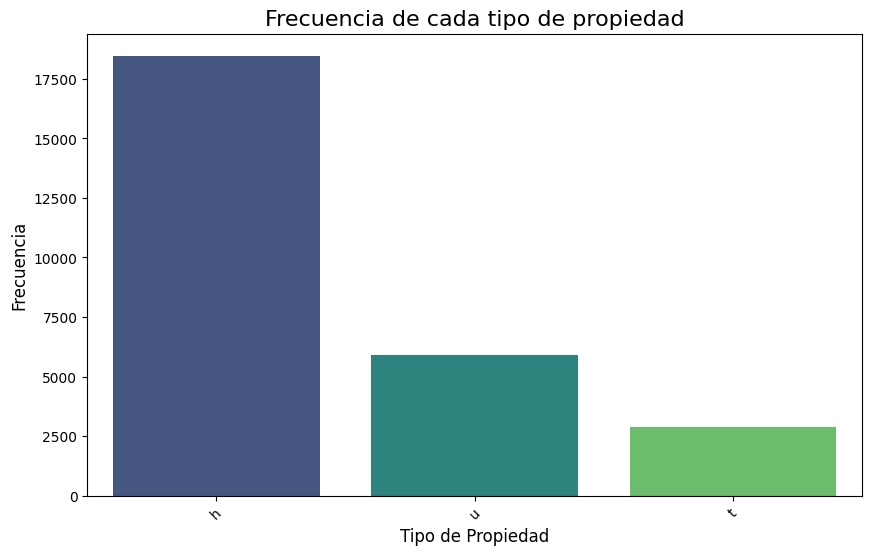

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada tipo de propiedad y ordenarlas
frecuencias = df_clean['Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencias.index, y=frecuencias.values, order=frecuencias.index, palette="viridis")

# Personalizar el gráfico
plt.title('Frecuencia de cada tipo de propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\1055981730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Type', order=df['Type'].value_counts().index, palette="viridis")


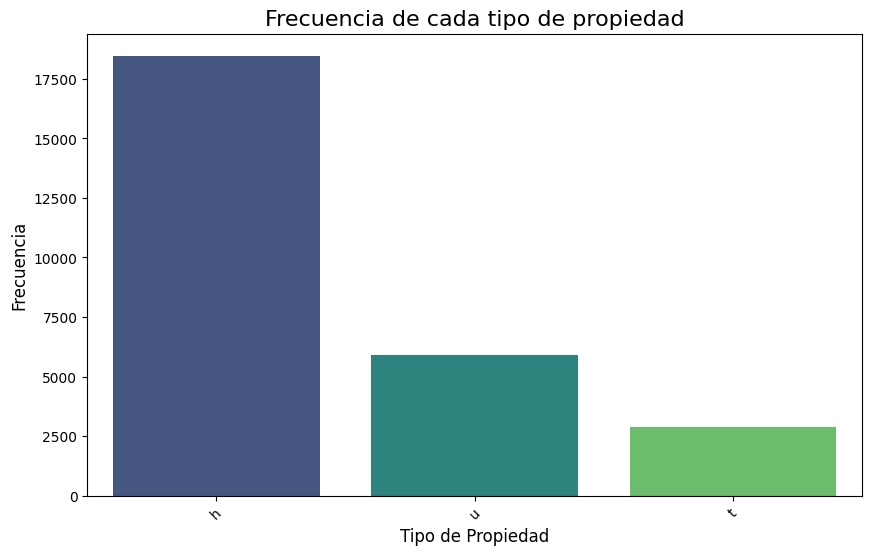

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Crear el countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Type', order=df['Type'].value_counts().index, palette="viridis")

# Personalizar el gráfico
plt.title('Frecuencia de cada tipo de propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [32]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [35]:
df_clean.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [36]:
df_clean['Bedroom2'] = df_clean['Bedroom2'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\2521468254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='Bedroom2', y='Price', estimator=lambda x: pd.Series(x).median(), palette='viridis')


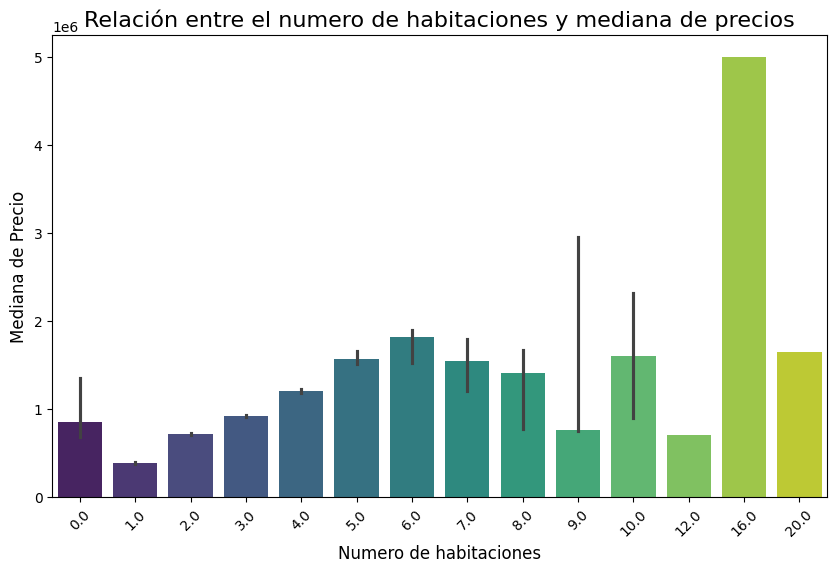

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Bedroom2', y='Price', estimator=lambda x: pd.Series(x).median(), palette='viridis')

# Personalizar el gráfico
plt.title('Relación entre el numero de habitaciones y mediana de precios', fontsize=16)
plt.xlabel('Numero de habitaciones', fontsize=12)
plt.ylabel('Mediana de Precio', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [38]:
spearman_corr = df['Price'].corr(df['Bedroom2'], method='spearman')

print(f"Coeficiente de correlación de Spearman: {spearman_corr}")

Coeficiente de correlación de Spearman: 0.4513703751897803


In [39]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

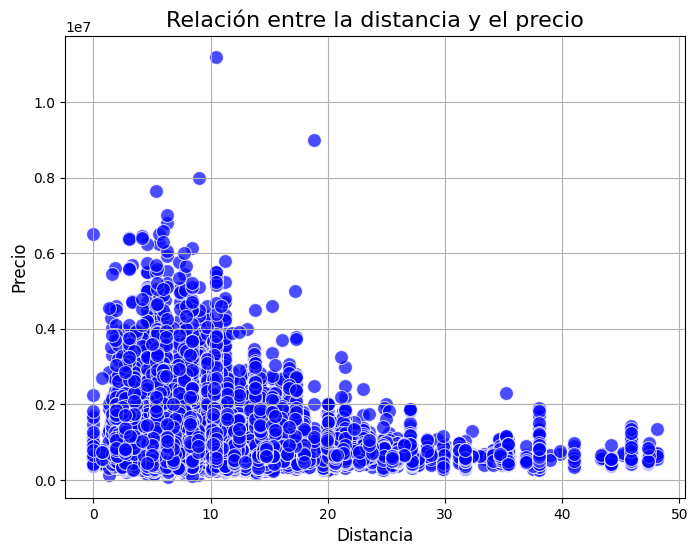

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance', y='Price', color='blue', s=100, alpha=0.7)

# Personalizar el gráfico
plt.title('Relación entre la distancia y el precio', fontsize=16)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.grid(True)
plt.show()

In [42]:
spearman_corr = df['Price'].corr(df['Distance'], method='spearman')
spearman_corr

np.float64(-0.18809341092744206)

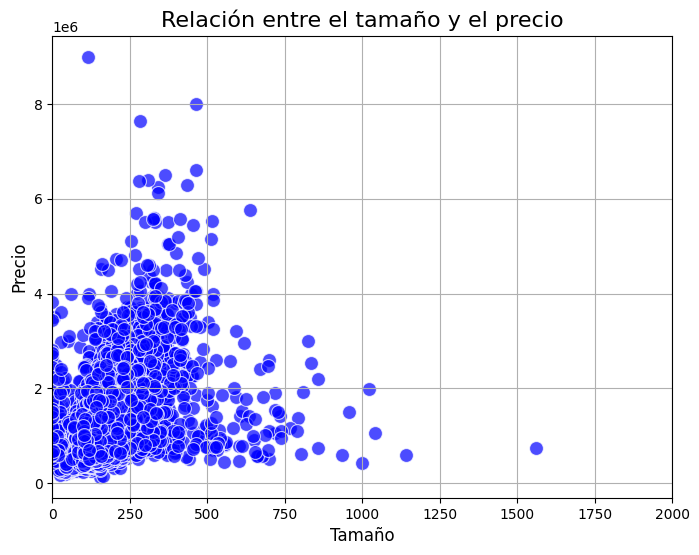

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BuildingArea', y='Price', color='blue', s=100, alpha=0.7)

# Personalizar el gráfico
plt.title('Relación entre el tamaño y el precio', fontsize=16)
plt.xlabel('Tamaño', fontsize=12)
plt.xlim([0,2000])
plt.ylabel('Precio', fontsize=12)
plt.grid(True)
plt.show()

In [44]:
spearman_corr = df['Price'].corr(df['BuildingArea'], method='spearman')
spearman_corr

np.float64(0.5553540450665009)

In [50]:
correlacion_pearson = df['Price'].corr(df['BuildingArea'])
correlacion_pearson

np.float64(0.10075363947310159)

In [52]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

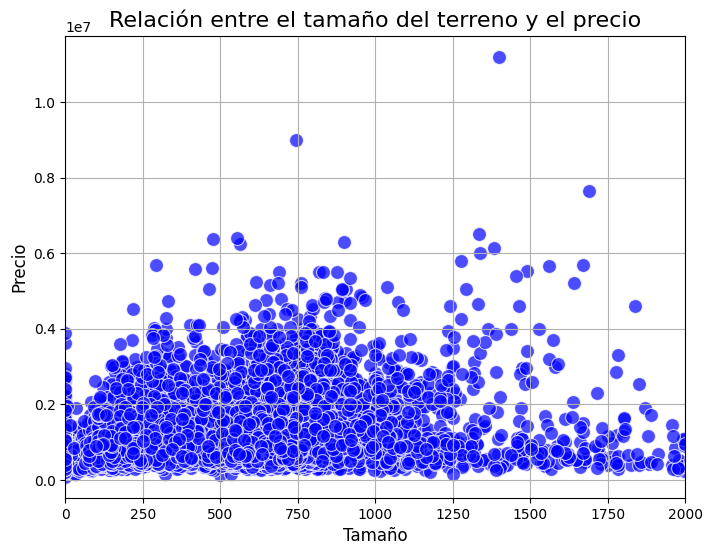

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Landsize', y='Price', color='blue', s=100, alpha=0.7)

# Personalizar el gráfico
plt.title('Relación entre el tamaño del terreno y el precio', fontsize=16)
plt.xlabel('Tamaño', fontsize=12)
plt.xlim([0,2000])
plt.ylabel('Precio', fontsize=12)
plt.grid(True)
plt.show()

In [58]:
df_clean['landsize_category'] = pd.qcut(df_clean['Landsize'], q=3)
medianas_precio = df_clean.groupby('landsize_category')['Price'].median().reset_index()
medianas_precio

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\173332429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['landsize_category'] = pd.qcut(df_clean['Landsize'], q=3)
C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\173332429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas_precio = df_clean.groupby('landsize_category')['Price'].median().reset_index()


,landsize_category,Price
0,"(-0.001, 304.0]",795000.0
1,"(304.0, 615.0]",930000.0
2,"(615.0, 433014.0]",1090000.0


C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\1621335245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['landsize_category'] = pd.qcut(df_clean['Landsize'], q=3)
C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\1621335245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medianas_precio = df_clean.groupby('landsize_category')['Price'].median().reset_index()
C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\1621335245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

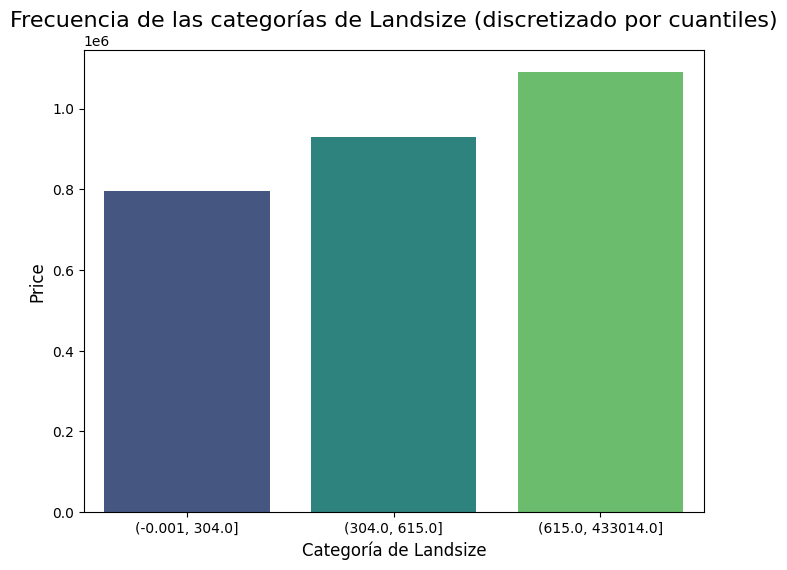

In [66]:
df_clean['landsize_category'] = pd.qcut(df_clean['Landsize'], q=3)
medianas_precio = df_clean.groupby('landsize_category')['Price'].median().reset_index()

# Crear un bar plot para visualizar la frecuencia de cada categoría
plt.figure(figsize=(8, 6))
sns.barplot(data=medianas_precio, x='landsize_category',  y='Price', palette='viridis')

# Personalizar el gráfico
plt.title('Frecuencia de las categorías de Landsize (discretizado por cuantiles)', fontsize=16)
plt.xlabel('Categoría de Landsize', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

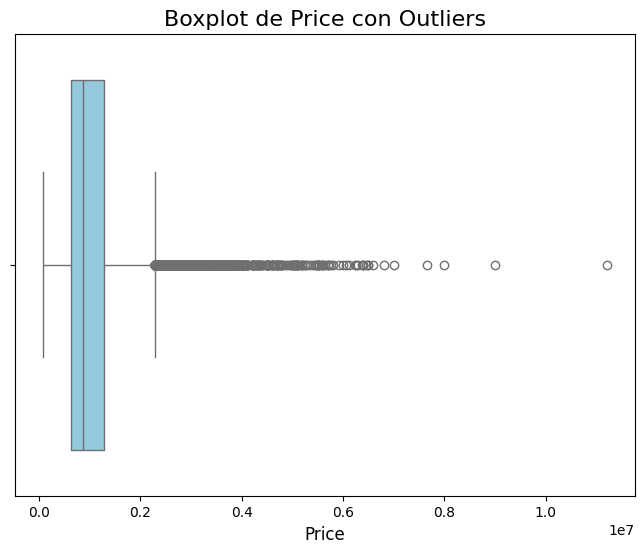

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='Price', color='skyblue')
plt.title('Boxplot de Price con Outliers', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.show()

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\3013221003.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_clean[(df_clean['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]


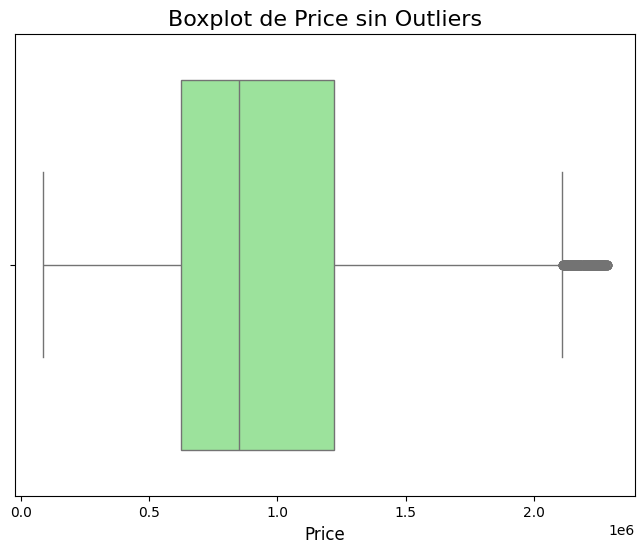

Q1: 635000.0, Q3: 1295000.0, IQR: 660000.0
Límite inferior: -355000.0, Límite superior: 2285000.0
Número de registros antes de eliminar outliers: 27247
Número de registros después de eliminar outliers: 25969


In [71]:
# Paso 2: Calcular los límites de los outliers usando el método de Tukey
Q1 = df_clean['Price'].quantile(0.25)
Q3 = df_clean['Price'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Paso 3: Eliminar los outliers
df_without_outliers = df_clean[(df_clean['Price'] >= lower_limit) & (df['Price'] <= upper_limit)]

# Paso 4: Crear un boxplot nuevamente después de eliminar los outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_without_outliers, x='Price', color='lightgreen')
plt.title('Boxplot de Price sin Outliers', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.show()

# Mostrar los límites calculados y los datos sin outliers
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límite inferior: {lower_limit}, Límite superior: {upper_limit}")
print(f"Número de registros antes de eliminar outliers: {len(df_clean)}")
print(f"Número de registros después de eliminar outliers: {len(df_without_outliers)}")

In [76]:
100 - len(df_without_outliers)/ len(df_clean) * 100

4.690424633904655

In [77]:
import scipy.stats as stats

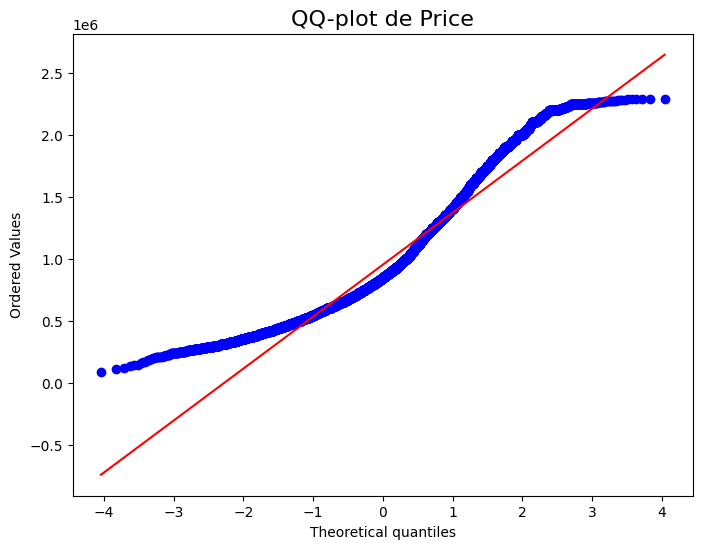

In [80]:
plt.figure(figsize=(8, 6))
stats.probplot(df_without_outliers['Price'], dist="norm", plot=plt)

# Personalizar el gráfico
plt.title('QQ-plot de Price', fontsize=16)
plt.show()

In [81]:
from scipy.stats import kstest

In [85]:
# Normalizamos los datos de 'price' para que tengan una media de 0 y desviación estándar de 1
statistic, p_value = kstest(df_clean['Price'], 'norm')

# Paso 2: Mostrar los resultados del test
print(f"Estadístico del test: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretar el valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No rechazamos la hipótesis nula: los datos siguen una distribución normal.")

Estadístico del test: 1.0000
Valor p: 0.0000
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


In [89]:
from scipy.stats import shapiro
statistic, p_value = shapiro(df_clean['Price'])
p_value

c:\Users\Carlota\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27247.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(2.6585672489331043e-100)

In [90]:
statistic, p_value = kstest(df_clean['Price'], 'norm', args=(df_clean['Price'].mean(), df_clean['Price'].std()))

In [91]:
p_value

np.float64(0.0)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\407349187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=df_clean, palette='Set2')


Text(0, 0.5, 'Precio')

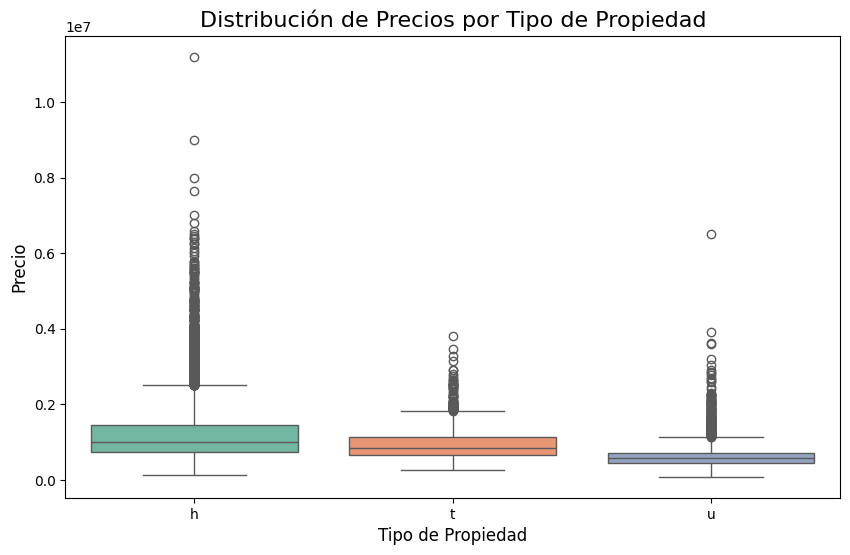

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_clean, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de Precios por Tipo de Propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=12)
plt.ylabel('Precio', fontsize=12)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\442573345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=df_without_outliers, palette='Set2')


Text(0, 0.5, 'Precio')

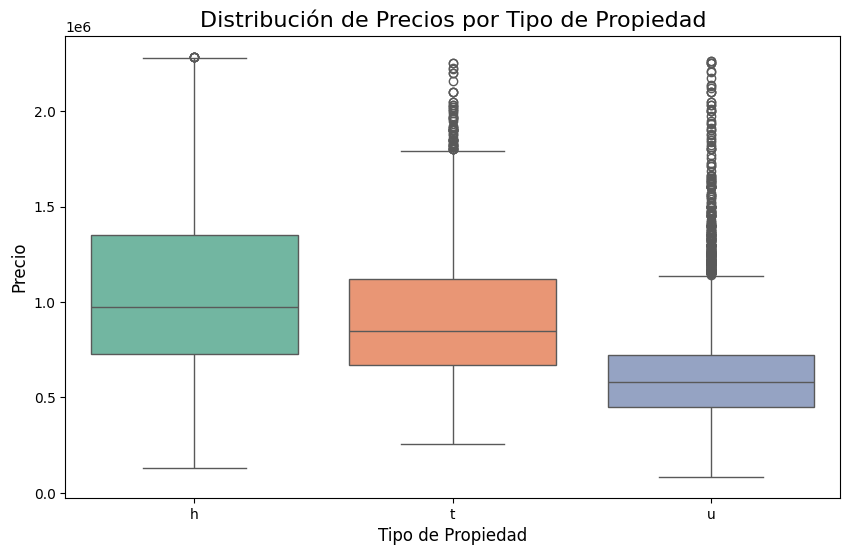

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_without_outliers, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de Precios por Tipo de Propiedad', fontsize=16)
plt.xlabel('Tipo de Propiedad', fontsize=12)
plt.ylabel('Precio', fontsize=12)

In [95]:
medianas_por_region = df_clean.groupby('Regionname')['Price'].median().sort_values(ascending=False)
medianas_por_region

Regionname
Southern Metropolitan         1250000.0
Eastern Metropolitan          1015000.0
South-Eastern Metropolitan     811250.0
Northern Metropolitan          752500.0
Western Metropolitan           750000.0
Eastern Victoria               679000.0
Northern Victoria              565000.0
Western Victoria               412125.0
Name: Price, dtype: float64

In [96]:
medianas_por_region = df_without_outliers.groupby('Regionname')['Price'].median().sort_values(ascending=False)
medianas_por_region

Regionname
Southern Metropolitan         1140000.0
Eastern Metropolitan          1001800.0
South-Eastern Metropolitan     810000.0
Northern Metropolitan          750000.0
Western Metropolitan           750000.0
Eastern Victoria               675000.0
Northern Victoria              565000.0
Western Victoria               412125.0
Name: Price, dtype: float64

In [97]:
from scipy.stats import chi2_contingency

In [98]:
df_clean['price_category'] = pd.qcut(df_clean['Price'], q=5)

# Paso 2: Crear la tabla de contingencia entre 'region' y 'price_category'
tabla_contingencia = pd.crosstab(df_clean['Regionname'], df_clean['price_category'])

# Paso 3: Realizar el test de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar resultados del test chi-cuadrado
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:\n", expected)

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las variables son dependientes.")
else:
    print("No rechazamos la hipótesis nula: Las variables son independientes.")

# Paso 4: Calcular el Cramér's V para medir la fuerza de la relación
# Cramér's V = sqrt(chi2_stat / (n * (min(k, r) - 1)))
# donde n es el número total de observaciones, k es el número de columnas y r el número de filas

n = df.shape[0]  # Número total de observaciones
k = tabla_contingencia.shape[1]  # Número de columnas (categorías de precio)
r = tabla_contingencia.shape[0]  # Número de filas (regiones)

# Calcular el valor de Cramér's V
cramers_v = np.sqrt(chi2_stat / (n * (min(k, r) - 1)))
print(f"Valor de Cramér's V: {cramers_v:.4f}")

Estadístico Chi-cuadrado: 5728.7274
Valor p: 0.0000
Grados de libertad: 28
Frecuencias esperadas:
 [[ 654.54411981  665.35310527  661.02951109  639.41154016  651.66172368]
 [  33.2073117    33.75568933   33.53633828   32.43958303   33.06107767]
 [1573.14638085 1599.12494494 1588.73351931 1536.77639113 1566.21876376]
 [  33.2073117    33.75568933   33.53633828   32.43958303   33.06107767]
 [ 268.25906622  272.68903245  270.91704596  262.05711349  267.07774189]
 [1705.17545148 1733.33431214 1722.07076788 1665.75304654 1697.66642196]
 [1163.25612979 1182.46586404 1174.78197034 1136.36250184 1158.13353399]
 [  19.20422845   19.5213625    19.39450888   18.76024079   19.11965937]]
Rechazamos la hipótesis nula: Las variables son dependientes.
Valor de Cramér's V: 0.2027


C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\2629264135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_category'] = pd.qcut(df_clean['Price'], q=5)


In [101]:
df_clean['Date']

1         3/12/2016
2         4/02/2016
4         4/03/2017
5         4/03/2017
6         4/06/2016
            ...    
34852    24/02/2018
34853    24/02/2018
34854    24/02/2018
34855    24/02/2018
34856    24/02/2018
Name: Date, Length: 27247, dtype: object

In [103]:
# Paso 1: Convertir 'sale_date' a tipo datetime (día/mes/año)
df_clean['sale_date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)

# Paso 2: Obtener el primer y último año en la columna 'sale_date'
primer_ano = df_clean['sale_date'].dt.year.min()
ultimo_ano = df_clean['sale_date'].dt.year.max()

# Paso 3: Filtrar las propiedades vendidas en el primer y último año
primer_ano_data = df_clean[df_clean['sale_date'].dt.year == primer_ano]
ultimo_ano_data = df_clean[df_clean['sale_date'].dt.year == ultimo_ano]

# Paso 4: Calcular la mediana del precio para ambos grupos
mediana_primer_ano = primer_ano_data['Price'].median()
mediana_ultimo_ano = ultimo_ano_data['Price'].median()

# Paso 5: Calcular la diferencia en porcentaje entre las medianas
diferencia_precio = ((mediana_ultimo_ano - mediana_primer_ano) / mediana_primer_ano) * 100

# Mostrar resultados
print(f"Mediana de precio en el primer año ({primer_ano}): {mediana_primer_ano}")
print(f"Mediana de precio en el último año ({ultimo_ano}): {mediana_ultimo_ano}")
print(f"El precio ha {'aumentado' if diferencia_precio > 0 else 'disminuido'} en un {abs(diferencia_precio):.2f}%")

Mediana de precio en el primer año (2016): 885000.0
Mediana de precio en el último año (2018): 836500.0
El precio ha disminuido en un 5.48%


C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\3527508672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sale_date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)


In [104]:
df_clean['month'] = df_clean['sale_date'].dt.month

# Paso 3: Contar el número de ventas por mes
ventas_por_mes = df_clean['month'].value_counts().sort_index().sort_values(ascending=False)
ventas_por_mes


C:\Users\Carlota\AppData\Local\Temp\ipykernel_20484\2013603134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['month'] = df_clean['sale_date'].dt.month


month
11    3408
9     3219
10    3118
5     2620
6     2425
3     2362
7     2359
8     2324
2     2067
12    1490
4     1206
1      649
Name: count, dtype: int64